In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

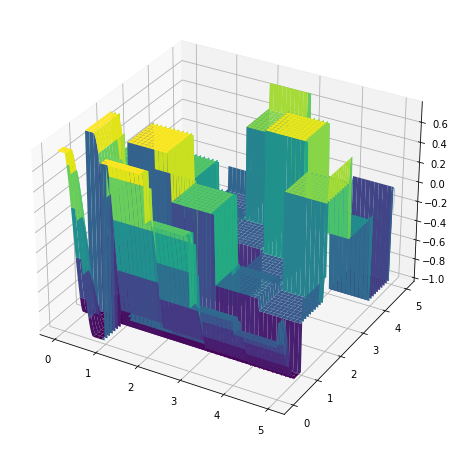

In [362]:
# point-by-point
def make_coefficient(p:float) -> float:
    i = np.floor(p[0])
    j = np.floor(p[1])
    u = 50*(i/np.pi - np.floor(i/np.pi))
    v = 50*(j/np.pi - np.floor(j/np.pi))
    w = u*v*(u+v)
    return 2*(w - np.floor(w)) - 1
    
def f(p):
    lamda = np.clip(np.clip((p-alpha)/(beta-alpha),0,np.inf),-np.inf,1)
    u = lamda*lamda*(3 - 2*lamda)
    a = make_coefficient(p)
    b = make_coefficient(p + np.array([1,0]))
    c = make_coefficient(p + np.array([0,1]))
    d = make_coefficient(p + np.array([1,1]))

    return a+(b-a)*u[0]+(c-a)*u[1]+(a - b - c + d)*u[0]*u[1]
n_points = 200
x = np.linspace(x_from,x_to,n_points)
z = x
p = np.array([(xx,zz) for xx in x for zz in z])

res = np.array([f(pp) for pp in p]).reshape(n_points,n_points)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
X,Z = np.meshgrid(x,z)
ax.plot_surface(X, Z, res, cmap='viridis')


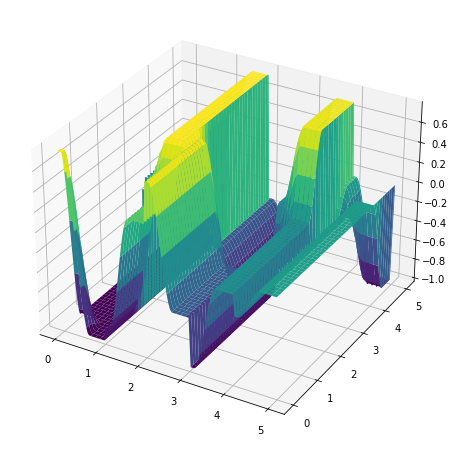

In [15]:
# vectorized
n_points = 140
alpha = 0.6
beta = 0.1
x_from = 0
x_to = 5 

def make_coefficient(i: int, j: int) -> float:
    u = 50*(i/np.pi - np.floor(i/np.pi))
    v = 50*(j/np.pi - np.floor(j/np.pi))
    w = u*v*(u+v)
    return 2*(w - np.floor(w)) - 1

def height_coefficients(x_from,x_to):
    flat_array = np.array([make_coefficient(ii,jj) for ii in range(x_from,x_to+1) for jj in range(x_from,x_to+1)])
    return flat_array.reshape((x_to-x_from+1,x_to-x_from+1))

x = np.linspace(x_from,x_to,n_points)
z = x
i = np.floor(x).astype(int)
j = np.floor(z).astype(int)
X,Z = np.meshgrid(x,z)


a = height_coefficients(x_from,x_to)
b = np.zeros_like(a)
c = np.zeros_like(a)
d = np.zeros_like(a)
b[0:-1,:] = a[1:,:] #b[i-1,j] = a[i,j]
c[:,0:-1] = a[:,1:] #c[i,j-1] = a[i,j]
d[0:-1,0:-1] = a[1:,1:] #d[i-1,j-1] = a[i,j]



def S(x: float, alpha: float, beta: float) -> float:

    lamda = np.clip(np.clip((x-alpha)/(beta-alpha),0,np.inf),-np.inf,1)
    return lamda*lamda*(3 - 2*lamda)




first = a[i,j]+(b[i,j]-a[i,j])*S(X-i,alpha,beta)+(c[i,j]-a[i,j])*S(Z-j,alpha,beta)+(a[i,j] -b[i,j] - c[i,j] + d[i,j])*S(X-i,alpha,beta)*S(Z-j,alpha,beta)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Z, first, cmap='viridis')

In [6]:
n_points = 10
x_from = 0
x_to = 10
alpha = -5
beta=2


n_points = 10
x_from = -1
x_to = 20
alpha = -5
beta=3

n_points = 10
x_from = -20
x_to = 60
alpha = -10
beta=10

n_points = 10
x_from = -20
x_to = 60
alpha = -15
beta=15

n_points = 140
alpha = 0.7
beta = 0.2
x_from = 0
x_to = 5 

In [175]:
def S(x: float, a: float =1, b: float =5) -> float:

    lamda = np.clip(np.clip((x-a)/(b-a),0,np.inf),-np.inf,1)
    return 3*lamda**2 - 2*lamda**3

def dSdx(x: float, a: float =1, b: float =5) -> float:

    lamda = np.clip(np.clip((x-a)/(b-a),0,np.inf),-np.inf,1)
    dldx = np.clip(np.clip(1/(b-a),0,np.inf),-np.inf,1)

    return 6*lamda*dldx - 6*lamda**2*dldx

def make_a(i: int, j: int) -> float:
    u = 50*(i/np.pi - np.floor(i/np.pi))
    v = 50*(j/np.pi - np.floor(j/np.pi))

    return 2*(u*v*(u+v) - np.floor(u*v*(u+v))) - 1

def dadx(i: int, j: int) -> float:
    #dadx = da/di*di/dx = da/di = da/du*du/di = 50*da/du
    u = 50*(i/np.pi - np.floor(i/np.pi))
    v = 50*(i/np.pi - np.floor(j/np.pi))

    return 2*(2*u*v + v**2 - np.floor(2*u*v + v**2))

def dady(i: int, j: int) -> float:
    #dadx = 50*da/dv
    u = 50*(i/np.pi - np.floor(i/np.pi))
    v = 50*(i/np.pi - np.floor(j/np.pi))

    return 2*(2*u*v + u**2 - np.floor(2*u*v + u**2))



def f(x: float, z: float, a:float, b:float, c:float, d:float, alpha:float, beta:float) -> float:
    i = np.floor(x).astype(int)[0,]
    j = np.floor(z).astype(int)[0,]
    return a[i] + (b - a)[i]*S(x-i,alpha,beta) + (c - a)[i]*S(z-j,alpha,beta) + (a - b - c + d)[i]*S(x-i,alpha,beta)*S(z-j,alpha,beta)





In [176]:
def make_surface(x_from: float or int, x_to:float or int, n_points:int, alpha:float or int, beta:float or int, rotated:bool = False, rotation_power:int=0) -> float:
    x = np.linspace(x_from,x_to,n_points+1)
    z = x 
    if rotated:
        p = np.array([x,z])
    
        rotated_p = 2**rotation_power*np.matmul(M**rotation_power,p)

        x = rotated_p[0].reshape(n_points+1,)
        z = rotated_p[1].reshape(n_points+1,)

    X,Z = np.meshgrid(x,z)

    coeff_array_temp = np.zeros(shape=(4,n_points+1,n_points+1))
    coeff_array_temp[0] = make_a(np.floor(X), np.floor(Z))

    coeff_array_temp[1,0:-1,:] = coeff_array_temp[0,1:,:] #b[i-1,j] = a[i,j]
    coeff_array_temp[2,:,0:-1] = coeff_array_temp[0,:,1:] #c[i,j-1] = a[i,j]
    coeff_array_temp[3,0:-1,0:-1] = coeff_array_temp[0,1:,1:] #d[i-1,j-1] = a[i,j]

    X = X[:-1,:-1]
    Z = Z[:-1,:-1]


    coeff_array = np.zeros(shape=(4,n_points,n_points))
    coeff_array = coeff_array_temp[:,:-1,:-1]
    a = coeff_array[0]
    b = coeff_array[1]
    c = coeff_array[2]
    d = coeff_array[3]

    if rotated:
        y = (0.5)**rotation_power*f(X,Z,a,b,c,d,alpha,beta)
        return y
    elif not rotated:
        y = f(X,Z,a,b,c,d,alpha,beta)

        return X,Z,y



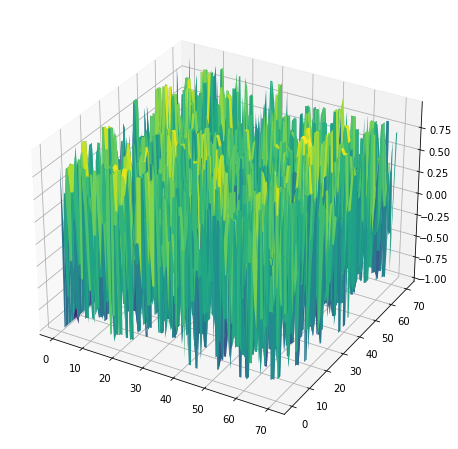

In [177]:
n_points = 100
x_from = 0
x_to = 70
alpha = 20
beta=35

X,Z,y = make_surface(x_to, x_from, n_points, alpha, beta)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Z, y, cmap='viridis')


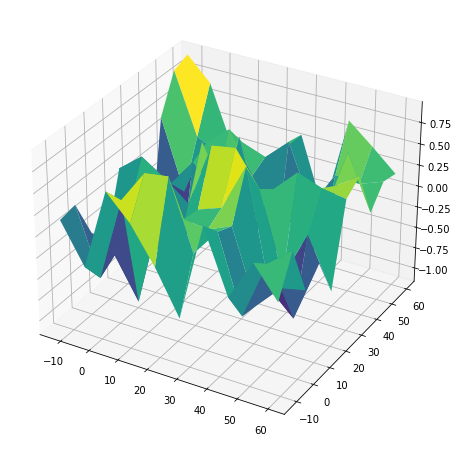

In [123]:
y_rotated = make_surface(x_to, x_from, n_points, alpha, beta, True, 1)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Z, y+y_rotated, cmap='viridis')